In [40]:
import numpy as np
import pandas as pd
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import csv
import io
from mpl_toolkits import mplot3d 
#import necessary libraries


In [41]:
data1=pd.read_csv("gg.csv") #and print the dataset given
data1.isnull().sum()
data1=data1.fillna(value = data1['radius_mean' ].mean())
data1=data1.fillna(value = data1['perimeter_mean' ].mean())
data1=data1.fillna(value = data1['concavity_mean' ].mean())
data1=data1.fillna(value = data1['compactness_se' ].mean())
data1=data1.fillna(value = data1['area_worst' ].mean())
data1=data1.fillna(value = data1['concavity_worst' ].mean())
data1.columns=["ID","Class","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30"]
data1.pop("ID")
df = data1['Class']
data1.pop("Class")
data1=(data1-data1.mean())/data1.std()
data1.insert(30, 'Class',df, True)
print(data1)

           f1        f2        f3        f4        f5        f6        f7  \
0    1.102422 -2.071512  1.262645  0.983510  1.567087  3.280628  0.314317   
1    1.836635 -0.353322  1.675175  1.907030 -0.826235 -0.486643 -0.044955   
2    1.586206  0.455786  1.556726  1.557513  0.941382  1.052000  0.141253   
3   -0.767260  0.253509 -0.584344 -0.763792  3.280667  3.399917  0.215399   
4    1.756953 -1.150804  1.765033  1.824624  0.280125  0.538866  0.142264   
..        ...       ...       ...       ...       ...       ...       ...   
564  2.118368  0.720838  2.046860  2.341795  1.040926  0.218868  0.219612   
565  1.711420  2.083301  1.605739  1.722326  0.102368 -0.017817  0.051267   
566  0.706858  2.043775  0.670400  0.577445 -0.839745 -0.038646 -0.035501   
567  1.845172  2.334403  1.969255  1.733693  1.524426  3.269267  0.400765   
568 -1.808817  1.220718 -1.795793 -1.346604 -3.109349 -1.149741 -0.191394   

           f8        f9       f10  ...       f22       f23       f24  \
0  

In [42]:
def norm_pdf(x, loc=0, scale=1):
    """PDF for the normal distribution."""
    z = (x - loc) / scale
    pdf = np.exp(-0.5 * z ** 2) / (np.sqrt(2 * np.pi) * scale)
    return pdf

In [43]:
dataset = np.array(data1)
np.random.shuffle(dataset) #shuffling to avoid bias
size_train=int(dataset.shape[0]*0.67)  #Training data size 70% of total
size_test=int(dataset.shape[0]-size_train) #Testing data size 30% of total
train_data = dataset[:size_train,:]
test_data = dataset[size_test:,:]
train_data = pd.DataFrame(train_data,columns =["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30","Class"])
test_data = pd.DataFrame(test_data,columns =["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30","Class"])
mean1 = train_data.groupby("Class").mean()   #classifying into two classes and finding the mean
mean1

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
Class,,,,,,,,,,,,,,,,,,,,,
0.0,-0.530553,-0.266366,-0.544263,-0.521492,-0.277416,-0.474092,-0.013863,-0.589890,-0.305748,-0.044784,...,-0.574346,-0.299399,-0.581233,-0.545668,-0.324995,-0.465710,-0.116373,-0.598524,-0.351547,-0.270774
1.0,1.058605,0.533946,1.064294,1.031728,0.422094,0.801809,0.087911,1.091135,0.403677,-0.045618,...,1.078002,0.508805,1.087981,1.015925,0.434904,0.686825,0.237162,1.036371,0.447748,0.307629


In [44]:
mean_vector = mean1.iloc[0]-mean1.iloc[1]
mean_vector

f1    -1.589158
f2    -0.800312
f3    -1.608557
f4    -1.553220
f5    -0.699510
f6    -1.275901
f7    -0.101775
f8    -1.681026
f9    -0.709425
f10    0.000833
f11   -1.295762
f12    0.010572
f13   -1.283152
f14   -1.220516
f15    0.046366
f16    0.079198
f17   -0.579517
f18   -0.926290
f19   -0.117623
f20   -0.228970
f21   -1.652348
f22   -0.808203
f23   -1.669214
f24   -1.561593
f25   -0.759899
f26   -1.152536
f27   -0.353535
f28   -1.634895
f29   -0.799295
f30   -0.578403
dtype: float64

In [45]:
points = train_data.groupby('Class')
positive_points = points.get_group(1)  #positive as class 1
negative_points = points.get_group(0)  #negative as class 0
del positive_points['Class']
del negative_points['Class']
pos_diff = positive_points - mean1.iloc[1]  #(xn-M1)  M1 is mean vector for all points of class 1
neg_diff = negative_points - mean1.iloc[0]  #(xn-M2)  M2 is mean vector for all points of class 0
pos_diff = pos_diff.values
neg_diff = neg_diff.values
N1 = len(positive_points)
N2 = len(negative_points)
print(N1)
print(N2)
print(pos_diff)
print(neg_diff)

141
240
[[-0.6647837  -0.11768566 -0.61445518 ...  0.46659998 -0.28248442
   0.84700669]
 [-0.16107957  0.89137361 -0.22643219 ... -0.13432187 -1.09551269
  -0.55710298]
 [-0.58510169  0.30779325 -0.50009051 ...  0.31446787  0.1555487
   1.97649553]
 ...
 [-1.10303476 -1.05466926 -1.08294187 ... -0.68960408 -0.17742113
  -0.54990525]
 [-1.02050696  0.03111571 -0.99308392 ... -0.57854764  0.66793431
   0.65875854]
 [-0.06716862  0.40544415  0.04314167 ...  0.25665767 -1.41716801
   1.82146765]]
[[-0.17979084  0.00837008 -0.08909486 ...  1.00918606 -0.03760054
   0.75546793]
 [ 0.45481946 -0.21715699  0.4034901  ... -0.36852236 -0.51604262
  -0.40059712]
 [ 0.40074953 -0.69611139  0.39654653 ...  0.45846781  1.13749201
   0.95921886]
 ...
 [-0.29931385  2.61006897 -0.3223171  ... -1.14500467 -1.80589661
  -1.10763499]
 [-0.5952756   0.33619809 -0.56493357 ... -0.80544579 -0.68091117
  -0.64421236]
 [ 0.14747456  0.75935197  0.14126825 ... -0.41887809 -0.81506892
  -0.5727888 ]]


In [46]:
sum_pos=np.zeros((30,30))   #to find Sw matrix -> within covariance matrix
sum_neg=np.zeros((30,30))

for i in range(len(pos_diff)):
  sum_pos= np.dot(pos_diff[i].reshape(30,1),pos_diff[i].reshape(1,30)) + sum_pos
for i in range(len(neg_diff)):
  sum_neg= np.dot(neg_diff[i].reshape(30,1),neg_diff[i].reshape(1,30)) + sum_neg

#summation of (xn-M1)^2 = sum_pos
#summation of (xn-M2)^2 = sum_neg

covariance_matrix = sum_pos/N1 + sum_neg/N2  
covariance_matrix


array([[ 1.09085256e+00,  5.78699465e-02,  1.06355842e+00,
         1.14577969e+00, -8.93139995e-02,  2.37611846e-01,
         9.99139577e-02,  6.74815033e-01, -1.46433412e-01,
        -5.50221787e-01,  6.65207776e-01, -8.90095925e-02,
         6.73681612e-01,  8.13562473e-01, -2.35567434e-01,
         4.83650273e-02,  2.47442024e-02,  1.41401537e-01,
        -1.84059127e-01, -1.43102650e-01,  9.23847884e-01,
        -7.13712413e-02,  9.01567342e-01,  9.56803909e-01,
        -3.36072937e-01,  1.89172857e-03,  7.22612571e-02,
         3.88222263e-01, -3.47510279e-01, -4.11066067e-01],
       [ 5.78699465e-02,  1.65556814e+00,  5.75242727e-02,
         5.12117471e-02, -2.62014384e-01,  7.95273019e-04,
        -3.65569387e-02, -1.84809680e-02, -1.39616177e-01,
        -1.27711575e-01, -2.13946547e-02,  7.89382048e-01,
         1.19619407e-02, -6.25799985e-02,  1.00100270e-01,
        -1.11356393e-01,  4.62631374e-02,  1.65002287e-03,
        -8.56539962e-02,  4.94953613e-02,  3.29697543e-

In [47]:
covariance_inverse = np.linalg.inv(covariance_matrix)   #finding Sw inverse
covariance_inverse

array([[ 2.37219758e+02, -3.80162467e+00, -6.66540905e+01,
        -1.27489215e+02, -4.27420577e+00, -7.41834156e+00,
         5.55458500e+00, -1.18701942e+00, -3.94013590e-01,
         1.09714214e+01,  1.20768920e+01, -2.99459950e+00,
         8.81010999e+00, -1.01748778e+01,  2.34592865e+00,
         1.38282336e-01,  2.94644779e+00, -7.53331023e+00,
         2.90100663e-01, -2.07560146e+00, -1.41164634e+02,
         6.65965115e+00, -5.84241055e-02,  9.62459709e+01,
         4.14852615e+00,  2.32658675e+00, -5.81866181e+00,
         8.37455595e+00,  7.82680976e-01, -1.01166416e-01],
       [-3.80162467e+00,  6.39433517e+00, -6.01355488e-02,
         5.67657216e-01, -3.71561685e-01, -7.23756440e-02,
         1.32988784e+00, -8.85431236e-01, -5.42863860e-01,
         5.55777256e-02, -2.08428588e+00,  2.13058442e+00,
        -6.68241859e-01,  2.40253300e+00, -7.44485435e-01,
        -1.37293992e-01,  5.38095989e-01, -4.86175994e-01,
        -6.49813876e-01, -1.26435807e-01,  1.42219645e+

In [48]:
mean_vector  # M1-M2

f1    -1.589158
f2    -0.800312
f3    -1.608557
f4    -1.553220
f5    -0.699510
f6    -1.275901
f7    -0.101775
f8    -1.681026
f9    -0.709425
f10    0.000833
f11   -1.295762
f12    0.010572
f13   -1.283152
f14   -1.220516
f15    0.046366
f16    0.079198
f17   -0.579517
f18   -0.926290
f19   -0.117623
f20   -0.228970
f21   -1.652348
f22   -0.808203
f23   -1.669214
f24   -1.561593
f25   -0.759899
f26   -1.152536
f27   -0.353535
f28   -1.634895
f29   -0.799295
f30   -0.578403
dtype: float64

In [49]:

wt_vector = np.dot(covariance_inverse,mean_vector)/(la.norm(np.dot(covariance_inverse,mean_vector)))

wt_vector   # w = (inverse of Sw)(M1-M2)

array([-0.36823624,  0.02302177, -0.01527931,  0.38509778,  0.01515957,
        0.16583979,  0.51357084, -0.20634032,  0.01676858,  0.00873946,
       -0.10449554,  0.0454468 , -0.0245516 ,  0.04600673, -0.04465171,
        0.00923588,  0.08261723, -0.04863677, -0.02625059, -0.0279951 ,
       -0.16308431, -0.10517368, -0.08373894,  0.13973755, -0.02593997,
        0.01007203, -0.53432513,  0.00075885, -0.0358253 , -0.02666683])

In [50]:
positive_points = positive_points.values
negative_points = negative_points.values
projected_pos_pts = np.dot(positive_points,wt_vector)  #projecting points belonging to class1 on w vector
projected_neg_pts = np.dot(negative_points,wt_vector)  #projecting points belonging to class0 on w vector

In [51]:
projected_pos_pts.shape
# print(projected_pos_pts)
projected_neg_pts.shape

(240,)

In [52]:
arrp = np.zeros((len(projected_pos_pts),1))
print(arrp)
arrn = np.zeros((len(projected_neg_pts),1))
print(arrn)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

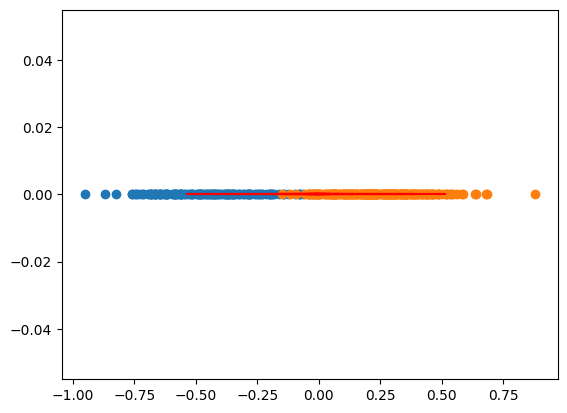

In [53]:
plt.scatter(projected_pos_pts,arrp)
plt.scatter(projected_neg_pts,arrn)
plt.plot(wt_vector,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'r')
plt.show()

In [54]:
final_positive_mean = projected_pos_pts.mean()
print(final_positive_mean)
final_negative_mean = projected_neg_pts.mean()
print(final_negative_mean)
final_positive_std = projected_pos_pts.std()
final_negative_std = projected_neg_pts.std()

-0.44131293081021444
0.24481984466674925


In [55]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])
result = solve(final_positive_mean,final_negative_mean,final_positive_std,final_negative_std)
result = result[1]

result #discriminant point to separate both positive and negative classes

-0.075247194054234

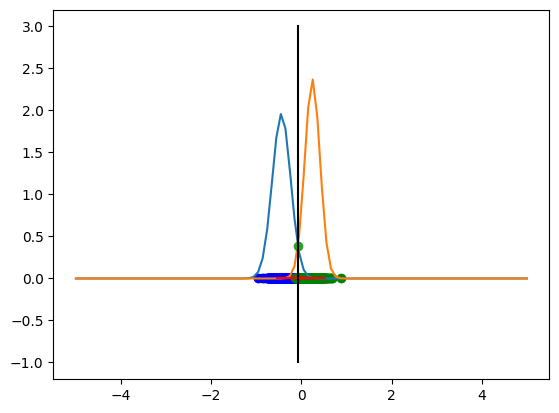

In [56]:
x = np.linspace(-5, 5, 100)
ptemp = np.zeros((len(projected_pos_pts),1))
ntemp = np.zeros((len(projected_neg_pts),1))
plt.plot(x, norm_pdf(x, final_positive_mean, final_positive_std))
plt.plot(x,norm_pdf(x,final_negative_mean,final_negative_std))
plt.plot(result,norm_pdf(result,final_positive_mean,final_positive_std),'o')
a=plt.scatter(projected_pos_pts,ptemp,color = 'b')
b=plt.scatter(projected_neg_pts,ntemp,color = 'g')
plt.plot(wt_vector,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'r')
# plt.legend(loc='upper left',ncol=3,fontsize=11)
plt.plot([result] * 2, [-1, 3], color='black', label="discriminant line")
plt.show()

In [57]:
points = test_data.groupby('Class')
positive_points = points.get_group(1)  #positive as class 1
negative_points = points.get_group(0)
del positive_points['Class']
del negative_points['Class']
positive_points = positive_points.values
negative_points = negative_points.values
projected_pos_pts = np.dot(positive_points,wt_vector)  #projecting points belonging to class1 on w vector
projected_neg_pts = np.dot(negative_points,wt_vector)  #projecting points belonging to class0 on w vector
pred_pos_dataset = pd.DataFrame(projected_pos_pts)
pred_neg_dataset = pd.DataFrame(projected_neg_pts)

pred_pos_dataset

,0
0,-0.258137
1,-0.354976
2,-0.559520
3,-0.340597
4,-0.630740
...,...
140,-0.418026
141,-0.440082
142,-0.160064
143,0.207475


In [58]:
pred_neg_dataset

,0
0,0.214586
1,0.032764
2,0.096848
3,0.205920
4,0.445811
...,...
231,0.158352
232,0.048334
233,0.175949
234,0.487548


In [59]:
pred_pos_dataset = pred_pos_dataset.values
pred_neg_dataset = pred_neg_dataset.values

# ptemp is an array of zeros which will represent the predicted class for the positive pts.So, appended to the predicted positive dataset
ptemp = np.zeros((len(pred_pos_dataset),1))
ntemp = np.zeros((len(pred_neg_dataset),1))
pred_pos = np.append(pred_pos_dataset, ptemp, axis=1)
pred_neg = np.append(pred_neg_dataset, ntemp, axis=1)

In [60]:
tpos=0 #true positive
tneg=0 #true negative
fpos=0 #false positive
fneg=0 #false negative
for i in range(len(pred_pos_dataset)):
  if pred_pos[i,0]>=result:
    pred_pos[i,1] = 0
    fneg=fneg+1
  else:
    pred_pos[i,1] = 1
    tpos=tpos+1

for i in range(len(pred_neg_dataset)):
  if pred_neg[i,0]>=result:
    pred_neg[i,1] = 0
    tneg=tneg+1
  else:
    pred_neg[i,1] = 1
    fpos=fpos+1

In [61]:
test_accuracy = (tpos+tneg)/(tpos+tneg+fpos+fneg)
precision = tpos / (tpos + fpos)
recall = tpos / (tpos + fneg)
print(test_accuracy*100)
print(precision)
print(recall)

96.8503937007874
0.965034965034965
0.9517241379310345
